# KNN intuition

KNN (k nearest neighbors) is one of the simplest machine learning algorithms that exist. It is used for regression and for classification and when we give them a point to make a prediction, it just check the k nearest neighbors (geometrically) and let them decide democratically, let's take a look.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from jupyterthemes import jtplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
jtplot.style()

In [3]:
data = {'x' : [1, 2, 3, 6, 7, 9], 'y': [2, 3, 1, 5, 7, 6], 'class': ['k', 'k', 'k', 'r', 'r', 'r']}
data = pd.DataFrame(data)
data

,x,y,class
0,1,2,k
1,2,3,k
2,3,1,k
3,6,5,r
4,7,7,r
5,9,6,r


In [4]:
def make_plot(x, y):
    fig, ax = plt.subplots(figsize = (13, 8))

    ax.scatter(data[data['class'] == 'k']['x'], data[data['class'] == 'k']['y'], color = 'w')
    ax.scatter(data[data['class'] == 'r']['x'], data[data['class'] == 'r']['y'], color = 'g')
    ax.plot([x], [y], color = 'r', marker = '*', markersize = 12)

In [5]:
interact(make_plot, x = (1, 8, 0.1), y = (2, 7, 0.1));

interactive(children=(FloatSlider(value=4.0, description='x', max=8.0, min=1.0), FloatSlider(value=4.0, descri…


KNN is an algorithm that works for both regression and classification:

- **Classification:** The K Nearest Neighbors are taken and a vote is made to determine the class.

- **Regression:** The K Nearest Neighbors are taken and the mean is taken as the prediction.

# Geometry matters


When we occupy KNN there is one thing that changes the results and that is that the algorithm is based on **distance**, so the definition of distance itself matters.


## Minkowski distance


Minkowski distance is the generalized distance metric. Here generalized means that we can manipulate the above formula to calculate the distance between two data points in different ways.


$$d(x, y) = \left(\sum |x_i - y_i|^p \right)^{\frac{1}{p}}$$


## Euclidean Distance

Euclidean distance is one of the most used distance metrics.  It is calculated using the Minkowski Distance formula by setting p’s value to 2. This will update the distance d’ formula as below


$$d(x, y) = \sqrt{\sum (x_i - y_i)^2}$$

Euclidean distance formula can be used to calculate the distance between two data points in a plane.


<img src = https://miro.medium.com/max/173/0*zoty_Iv6Im-PBDvw.png>


## Manhattan Distance:


We use Manhattan Distance if we need to calculate the distance between two data points in a grid-like path. As mentioned above, we use the Minkowski distance formula to find Manhattan distance by setting p’s value as 1.

Distance d will be calculated using an absolute sum of the difference between its cartesian coordinates as below :

$$d(x, y) = \sum |x_i - y_i|$$


<img src = https://miro.medium.com/max/200/0*WH9xVZc-T9IsfH6a.png>


## Hamming Distance


A Hamming distance in information technology represents the number of points at which two corresponding pieces of data can be different. It is often used in various kinds of error correction or evaluation of contrasting strings or pieces of data.

the Hamming distance is a very practical metric for measuring data strings. The Hamming distance involves counting up which set of corresponding digits or places are different, and which are the same. For example, take the text string “hello world” and contrast it with another text string, “herra poald.” There are five places along the corresponding strings where the letters are different.

<img src = https://www.researchgate.net/profile/Fredrick-Ishengoma/publication/264978395/figure/fig1/AS:295895569584128@1447558409105/Example-of-Hamming-Distance.png>

## Exercise 

- Implement the KNN for classification and regression.

In [9]:
import numpy as np

class KNNClassifier:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(most_common)
        return predictions

# Ejemplo de uso:
X_train = np.array([[10, 20], [20, 30], [30, 40], [40, 50]])
y_train = np.array([50, 30, 10, 10])
X_test = np.array([[20, 20], [30, 30]])

knn_classifier = KNNClassifier(k=2)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)
print("Predictions:", predictions)

Predictions: [50, 10]


In [10]:

class KNNRegressor:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            mean_value = np.mean(k_nearest_labels)
            predictions.append(mean_value)
        return predictions

# Ejemplo de uso:
X_train = np.array([[10, 20], [20, 30], [30, 40], [40, 50]])
y_train = np.array([20, 30, 40, 50])
X_test = np.array([[20, 20], [30, 30]])

knn_regressor = KNNRegressor(k=2)
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
print("Predictions:", predictions)

Predictions: [25.0, 35.0]


# Iris Data

In [11]:
df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Sklearn



In [12]:
from sklearn.neighbors import KNeighborsClassifier

# KNN in regression

In [13]:
data = pd.read_csv('auto-mpg.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'auto-mpg.csv'

In [ ]:
data.head()

## Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# k-Nearest Neighbors and the Curse of Dimensionality

- **What is the “Curse of Dimensionality”?**

The Curse of Dimensionality is termed by mathematician R. Bellman in his book “Dynamic Programming” in 1957. According to him, the curse of dimensionality is the problem caused by the exponential increase in volume associated with adding extra dimensions to Euclidean space.  

La maldición de la dimensionalidad básicamente significa que el error aumenta con el aumento en el número de características. 

<img src = "curse-of-dimensionality.jpg">


For the KNN this is particularly problematic, because as the available space increases, the k nearest neighbors are less and less representative and therefore the predictions become worse.

### How do I overcome the curse of dimensionality when using the k-nearest neighbors algorithm?


The problem is fundamentally that there isn’t enough data available for the number of dimensions. As the number of dimensions increases the size of the data space increases, and the amount of data needed to maintain density also increases. Without dramatic increases in the size of the data set, k-nearest neighbors loses all predictive power. And this makes one possible solution for the issue straightforward: **Add more data**. 


This can work but we need the resources to handle this volume of data and not to mention that this also worsens performance so more computing power is needed.

This is where the concept of dimensionality reduction comes into play.

Variable Description

- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

In [14]:
data = pd.read_csv("titanic.csv")

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data.drop('Cabin', axis = 1, inplace = True)

In [20]:
columns = data.columns

In [21]:
categorical = [c for c in columns if data[c].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :')

for i, c in enumerate(categorical):
    print('{:2} → {}'.format(i + 1, c))

There are 4 categorical variables

The categorical variables are :
 1 → Name
 2 → Sex
 3 → Ticket
 4 → Embarked


In [22]:
data[categorical].head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [23]:
data[categorical].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    2
dtype: int64

## Cardinality

In [24]:
msn = '{:15} contains → {:5} labels'
for c in categorical:
    print(msn.format(c, len(data[c].unique())))

Name            contains →   891 labels
Sex             contains →     2 labels
Ticket          contains →   681 labels
Embarked        contains →     4 labels


we have two categorical variables with a high cardinality, so I'm going to remove them from the data set.

In [25]:
data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [26]:
columns = data.columns

In [27]:
categorical = [c for c in columns if data[c].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :')

for i, c in enumerate(categorical):
    print('{:2} → {}'.format(i + 1, c))

There are 2 categorical variables

The categorical variables are :
 1 → Sex
 2 → Embarked


In [28]:
data[categorical].isnull().sum()

Sex         0
Embarked    2
dtype: int64

In [29]:
msn = '{:15} contains → {:5} labels'
for c in categorical:
    print(msn.format(c, len(data[c].unique())))

Sex             contains →     2 labels
Embarked        contains →     4 labels


### Explore Categorical Variables

**Sex**

In [30]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

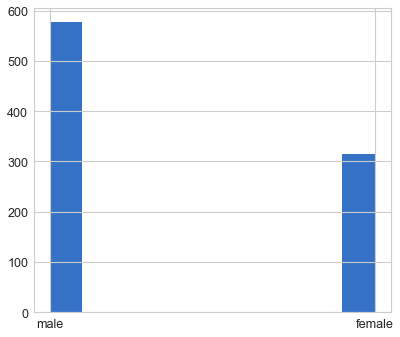

In [31]:
data['Sex'].hist()

**Embarked**

In [32]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
data['Embarked'].isnull().sum()

2

<AxesSubplot:>

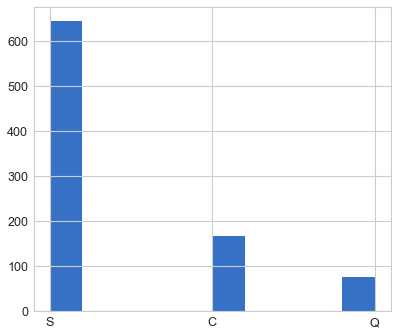

In [35]:
data['Embarked'].hist()

### Explore Numerical Variables

In [36]:
# find numerical variables

numerical = [c for c in columns if data[c].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The categorical variables are :')

for i, n in enumerate(numerical):
    print('{:2} → {}'.format(i + 1, n))

There are 7 numerical variables

The categorical variables are :
 1 → PassengerId
 2 → Survived
 3 → Pclass
 4 → Age
 5 → SibSp
 6 → Parch
 7 → Fare


- `Survived` Is our target
- `PassengerId` Is an useless variable I'll drop it.

In [37]:
data.drop('PassengerId', axis = 1, inplace = True)

In [38]:
columns = data.columns

In [39]:
# find numerical variables

numerical = [c for c in columns if data[c].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The categorical variables are :')

for i, n in enumerate(numerical):
    print('{:2} → {}'.format(i + 1, n))

There are 6 numerical variables

The categorical variables are :
 1 → Survived
 2 → Pclass
 3 → Age
 4 → SibSp
 5 → Parch
 6 → Fare


In [40]:
data[numerical].head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [41]:
data[numerical].isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [42]:
data[numerical].nunique()

Survived      2
Pclass        3
Age          88
SibSp         7
Parch         7
Fare        248
dtype: int64

<AxesSubplot:>

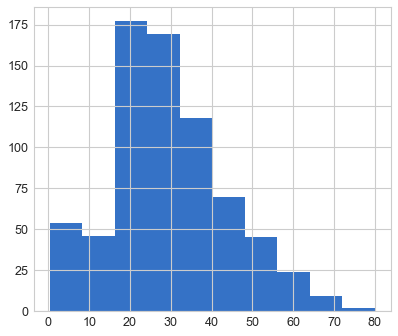

In [43]:
data['Age'].hist()

<AxesSubplot:>

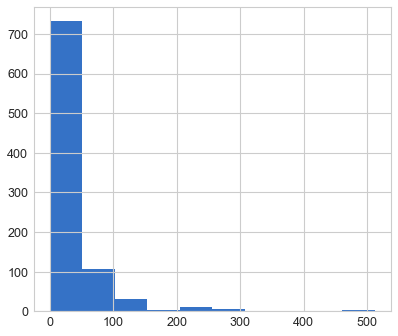

In [44]:
data['Fare'].hist()

### Outliers in numerical variables

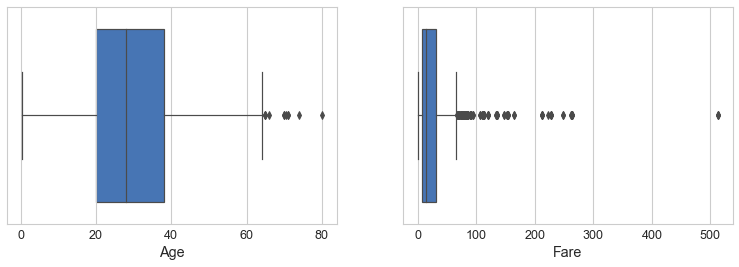

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (13, 4))


sns.boxplot(data = data, x = 'Age', ax = ax[0])
sns.boxplot(data = data, x = 'Fare', ax = ax[1]);

In [46]:
outliers = az.Outliers()

NameError: name 'az' is not defined

In [47]:
outliers.fit(data[['Age', 'Fare']], verbose = True);

NameError: name 'outliers' is not defined

## Declare feature vector and target variable

In [48]:
X = data.drop('Survived', axis = 1)

In [49]:
y = data['Survived']

## Split data into separate training and test set

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
X_train.shape, X_test.shape

((668, 7), (223, 7))

In [52]:
categorical = [c for c in X_train.columns if X_train[c].dtype == 'O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :')

for i, c in enumerate(categorical):
    print('{:2} → {}'.format(i + 1, c))

There are 2 categorical variables

The categorical variables are :
 1 → Sex
 2 → Embarked


In [53]:
numerical = [c for c in X_train.columns if X_train[c].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The categorical variables are :')

for i, n in enumerate(numerical):
    print('{:2} → {}'.format(i + 1, n))

There are 5 numerical variables

The categorical variables are :
 1 → Pclass
 2 → Age
 3 → SibSp
 4 → Parch
 5 → Fare


### Engineering missing values in numerical variables

In [54]:
X_train[numerical].isnull().sum()

Pclass      0
Age       129
SibSp       0
Parch       0
Fare        0
dtype: int64

In [55]:
X_test[numerical].isnull().sum()

Pclass     0
Age       48
SibSp      0
Parch      0
Fare       0
dtype: int64

In [56]:
for d in [X_train, X_test]:
    for col in numerical:
        col_median = X_train.loc[:, col].median() #only use the training set
        d.loc[:, col].fillna(col_median, inplace = True)

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [57]:
X_train[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [58]:
X_test[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

In [59]:
X_train[categorical].isnull().sum()

Sex         0
Embarked    2
dtype: int64

In [60]:
for d in [X_train, X_test]:
    d['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace = True)

In [61]:
X_train[categorical].isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [62]:
X_test[categorical].isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [63]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [64]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### KNN is robust to outliers so I won't remove them from the dataset

### Encode categorical variables

In [65]:
categorical

['Sex', 'Embarked']

In [66]:
X_train[categorical].head()

,Sex,Embarked
219,male,S
345,female,S
10,female,S
59,male,S
380,female,C


In [67]:
ohe = []

for c in categorical:
        ohe.append(pd.get_dummies(X_train.loc[:, c], drop_first = True))

In [68]:
X_train = pd.concat([X_train[numerical], *ohe], axis = 1)

In [69]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
219,2,30.0,0,0,10.500,1,0,1
345,2,24.0,0,0,13.000,0,0,1
10,3,4.0,1,1,16.700,0,0,1
59,3,11.0,5,2,46.900,1,0,1
380,1,42.0,0,0,227.525,0,0,0


In [70]:
ohe = []

for c in categorical:
        ohe.append(pd.get_dummies(X_test[c], drop_first = True))

In [71]:
X_test = pd.concat([X_test[numerical], *ohe], axis = 1)

In [72]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
401,3,26.0,0,0,8.0500,1,0,1
288,2,42.0,0,0,13.0000,1,0,1
312,2,26.0,1,1,26.0000,0,0,1
64,1,28.0,0,0,27.7208,1,0,0
52,1,49.0,1,0,76.7292,0,0,0


### Feature Scaling

In [73]:
cols = X_train.columns

In [74]:
from sklearn.preprocessing import RobustScaler

In [75]:
scaler = RobustScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

In [77]:
X_test = scaler.transform(X_test)

In [78]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [79]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [80]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,-0.652695,0.086087,0.531437,0.377246,0.741689,-0.353293,0.088323,-0.276946
std,0.828127,0.991342,1.095404,0.796294,2.157496,0.478351,0.283977,0.447825
min,-2.000000,-2.121538,0.000000,0.000000,-0.646253,-1.000000,0.000000,-1.000000
25%,-1.000000,-0.461538,0.000000,0.000000,-0.291900,-1.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.538462,1.000000,0.000000,0.708100,0.000000,0.000000,0.000000
max,0.000000,3.307692,8.000000,6.000000,22.346401,0.000000,1.000000,0.000000


## Model training

In [81]:
clf = KNeighborsClassifier()

In [82]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

## Predict results

In [83]:
y_pred_test = clf.predict(X_test)

In [84]:
clf.predict_proba(X_test);

## Check accuracy score

In [85]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8386


In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[121,  18],
       [ 18,  66]], dtype=int64)

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       139
           1       0.79      0.79      0.79        84

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



In [88]:
clf = KNeighborsClassifier(n_neighbors = 7)

In [89]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
y_pred_test = clf.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8341


In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[121,  18],
       [ 19,  65]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       139
           1       0.78      0.77      0.78        84

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [94]:
cls = KNeighborsClassifier(n_neighbors = 5)

In [95]:
ac = []

for i in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    
    y_pred_test = clf.predict(X_test)
    
    ac.append(accuracy_score(y_test, y_pred_test))

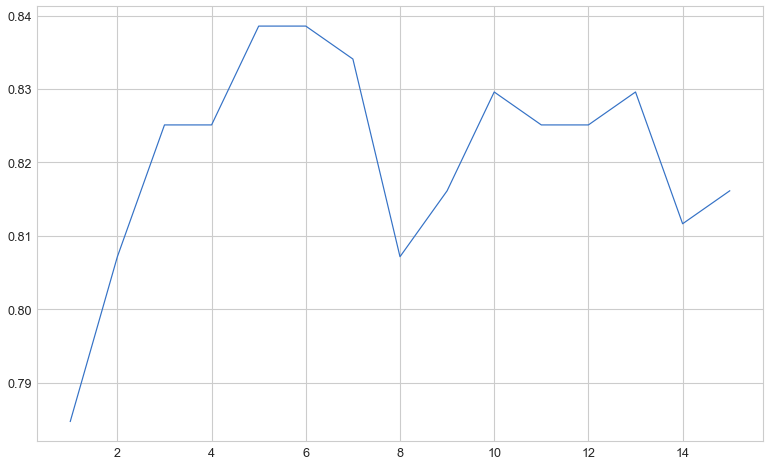

In [96]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(range(1, 16), ac)

In [97]:
cls = KNeighborsClassifier(n_neighbors = 3)

In [98]:
cls.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
y_pred_test = cls.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8251


In [101]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_test)
cm

array([[118,  21],
       [ 18,  66]], dtype=int64)

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       139
           1       0.76      0.79      0.77        84

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [103]:
cls = KNeighborsClassifier()
parameters_KNN = {
    'n_neighbors': (1,5, 3, 10),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),}

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_search_KNN = GridSearchCV(
    estimator = cls,
    param_grid = parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)

In [106]:
grid_search_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 5, 3, 10), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [107]:
print('Best score: {} with param: {}'.format(grid_search_KNN.best_score_, grid_search_KNN.best_params_))

Best score: 0.806957692739311 with param: {'leaf_size': 40, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [108]:
grid_search_KNN.best_params_

{'leaf_size': 40,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

In [109]:
clf = KNeighborsClassifier(**grid_search_KNN.best_params_)

In [110]:
clf.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=40, n_neighbors=10, p=1)

In [111]:
clf.score(X_test, y_test)

0.8116591928251121

In [112]:
clf.score(X_train, y_train)

0.8173652694610778